# AE Training

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import label_binarize
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import fetch_openml
# from sklearn.preprocessing import StandardScaler
#
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# X = X.astype('float32') / 255.0
# y = y.astype(int)
#
# y_bin = label_binarize(y, classes=np.unique(y))
#
# X_train, X_test, y_train, y_test, y_train_bin, y_test_bin = train_test_split(
#     X, y, y_bin, test_size=0.2, random_state=42
# )
# scaler = StandardScaler()
# X_tr_scaled = scaler.fit_transform(X_train)
# X_te_scaled = scaler.transform(X_test)
# X_train_tensor = torch.tensor(X_tr_scaled, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_te_scaled, dtype=torch.float32)
#
# class Encoder(nn.Module):
#     def __init__(self, input_dim=784, latent_dim=64):
#         super(Encoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, 512),
#             nn.ReLU(),
#             nn.Linear(512, 256),
#             nn.ReLU(),
#             nn.Linear(256, 256),
#             nn.ReLU(),
#             nn.Linear(256, latent_dim)
#         )
#
#     def forward(self, x):
#         return self.encoder(x)
#
# class Decoder(nn.Module):
#     def __init__(self, latent_dim=64, output_dim=784):
#         super(Decoder, self).__init__()
#         self.decoder = nn.Sequential(
#             nn.Linear(latent_dim, 256),
#             nn.ReLU(),
#             nn.Linear(256, 512),
#             nn.ReLU(),
#             nn.Linear(512, 512),
#             nn.ReLU(),
#             nn.Linear(512, output_dim),
#             nn.Sigmoid()
#         )
#
#     def forward(self, x):
#         return self.decoder(x)
#
# class Autoencoder(nn.Module):
#     def __init__(self, encoder, decoder):
#         super(Autoencoder, self).__init__()
#         self.encoder = encoder
#         self.decoder = decoder
#
#     def forward(self, x):
#         latent = self.encoder(x)
#         return self.decoder(latent)
#
# n_components_list = [2, 4, 8, 16, 32, 64, 128]
# for latent_dim in n_components_list:
#     encoder = Encoder(input_dim=784, latent_dim=latent_dim)
#     decoder = Decoder(latent_dim=latent_dim, output_dim=784)
#     autoencoder = Autoencoder(encoder, decoder)
#
#     criterion = nn.MSELoss()
#     optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)
#
#     def train_autoencoder(model, train_data, num_epochs=20, batch_size=64):
#         model.train()
#         train_loss = []
#
#         for epoch in range(num_epochs):
#             epoch_loss = 0.0
#             num_batches = len(train_data) // batch_size
#             for i in range(0, len(train_data), batch_size):
#                 batch = train_data[i:i+batch_size]
#                 inputs = torch.tensor(batch, dtype=torch.float32)
#
#                 optimizer.zero_grad()
#                 outputs = model(inputs)
#
#                 loss = criterion(outputs, inputs)
#                 loss.backward()
#                 optimizer.step()
#
#                 epoch_loss += loss.item()
#
#             avg_loss = epoch_loss / num_batches
#             train_loss.append(avg_loss)
#             print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")
#         file_name = r'F:\Pycharm\Pycharm_Files\Pytorch\Others\dimension\autoencoder_'+str(latent_dim)+'.pkl'
#         torch.save(model.state_dict(), file_name)
#         return train_loss
#
#     train_loss = train_autoencoder(autoencoder, X_train, num_epochs=10)
#
#     def test_autoencoder(model, test_data):
#         model.eval()
#         with torch.no_grad():
#             inputs = torch.tensor(test_data, dtype=torch.float32)
#             outputs = model(inputs)
#
#             input_image = inputs[0].view(28, 28).numpy()
#             output_image = outputs[0].view(28, 28).numpy()
#
#             fig, axes = plt.subplots(1, 2, figsize=(8, 4))
#             axes[0].imshow(input_image, cmap='gray')
#             axes[0].set_title("Original Image")
#             axes[1].imshow(output_image, cmap='gray')
#             axes[1].set_title("Reconstructed Image")
#             plt.show()
#
#     test_autoencoder(autoencoder, X_test)
#
# def get_latent_representation(model, data):
#     model.eval()
#     with torch.no_grad():
#         inputs = torch.tensor(data, dtype=torch.float32)
#         latent = model.encoder(inputs)
#     return latent
#
# latent_train = get_latent_representation(autoencoder, X_train)
# latent_test = get_latent_representation(autoencoder, X_test)
#
# from sklearn.decomposition import PCA
#
# pca = PCA(n_components=2)
# latent_train_2d = pca.fit_transform(latent_train)
# latent_test_2d = pca.transform(latent_test)
#
# plt.figure(figsize=(8, 6))
# plt.scatter(latent_train_2d[:, 0], latent_train_2d[:, 1], c=y_train, cmap='tab10', s=2)
# plt.colorbar()
# plt.title("2D PCA of Latent Space (Training Set)")
# plt.show()
#
# from sklearn.manifold import TSNE
#
# # 假设你已经有了训练好的 autoencoder 和提取的潜在空间表示
# # 1. 获取潜在空间表示
# latent_train = get_latent_representation(autoencoder, X_train)
# latent_test = get_latent_representation(autoencoder, X_test)
#
# # 2. 使用 t-SNE 进行降维
# # 我们将潜在空间表示降至 2 维，以便于可视化
# tsne = TSNE(n_components=2, random_state=42)
# latent_train_tsne = tsne.fit_transform(latent_train)
# latent_test_tsne = tsne.fit_transform(latent_test)
#
# # 3. 可视化 t-SNE 结果
# plt.figure(figsize=(8, 6))
#
# # 使用不同的颜色来区分不同的数字标签
# plt.scatter(latent_train_tsne[:, 0], latent_train_tsne[:, 1], c=y_train, cmap='tab10', s=2)
# plt.colorbar()
# plt.title("t-SNE of Latent Space (Training Set)")
# plt.xlabel("t-SNE Component 1")
# plt.ylabel("t-SNE Component 2")
# plt.show()
#
# # 也可以在测试集上进行可视化
# plt.figure(figsize=(8, 6))
# plt.scatter(latent_test_tsne[:, 0], latent_test_tsne[:, 1], c=y_test, cmap='tab10', s=2)
# plt.colorbar()
# plt.title("t-SNE of Latent Space (Test Set)")
# plt.xlabel("t-SNE Component 1")
# plt.ylabel("t-SNE Component 2")
# plt.show()

# 实验

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.manifold import trustworthiness
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import umap.umap_ as umap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import torch
import datetime
import torch.nn as nn
from copy import deepcopy

In [2]:
class Modified_MLP_Block(nn.Module):
    def __init__(self, input_dim, hidden_channel, output_dim, hidden_size=4):
        super(Modified_MLP_Block, self).__init__()
        self.activation = nn.ReLU()
        self.encodeU = nn.Linear(input_dim, hidden_channel)
        self.encodeV = nn.Linear(input_dim, hidden_channel)
        self.In = nn.Linear(input_dim, hidden_channel)

        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_channel, hidden_channel) for _ in range(hidden_size)
        ])
        self.out = nn.Linear(hidden_channel, output_dim)
        # self._init_weights()

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.1)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, x):
        U = self.activation(self.encodeU(x))
        V = self.activation(self.encodeV(x))
        Hidden = self.activation(self.In(x))

        for layer in self.hidden_layers:
            Z = self.activation(layer(Hidden))
            Hidden = (1 - Z) * U + Z * V

        x = self.out(Hidden)
        return x

class Encoder(nn.Module):
    def __init__(self, input_dim=784, latent_dim=64):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim)
        )

    def forward(self, x):
        return self.encoder(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim=64, output_dim=784):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.decoder(x)

class Autoencoder(nn.Module):
    def __init__(self, encoder, decoder):
        super(Autoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        latent = self.encoder(x)
        return self.decoder(latent)

def get_ae(n_components):
    file_name = r'F:\Pycharm\Pycharm_Files\Pytorch\Others\dimension\autoencoder_'+str(n_components)+'.pkl'
    encoder = Encoder(input_dim=784, latent_dim=n_components)
    decoder = Decoder(latent_dim=n_components, output_dim=784)
    autoencoder = Autoencoder(encoder, decoder)
    autoencoder.load_state_dict(torch.load(file_name, weights_only=True))
    return encoder, decoder, autoencoder

In [3]:
def evaluate_dimensionality_quality(
    X_orig, X_reduced, y,
    n_neighbors=5,
    sample_size=2000,
    max_dims=50,
    compute_trust=True,
    random_state=42
):
    """
    低内存版本的降维质量评估函数

    参数：
        X_orig: 原始数据 (n_samples, input_dim)
        X_reduced: 降维后的数据 (n_samples, reduced_dim)
        y: 标签
        n_neighbors: KNN 和信任度使用的近邻数
        sample_size: 采样用于评估的样本数量
        max_dims: 降维后保留的最大特征数（避免互信息爆内存）
        compute_trust: 是否计算 trustworthiness（占内存）
        random_state: 随机种子

    返回：
        dict：包含多个评估指标
    """
    # 1. 随机采样子集
    np.random.seed(random_state)
    idx = np.random.choice(len(X_orig), size=min(sample_size, len(X_orig)), replace=False)
    Xo = X_orig[idx]
    Xr = X_reduced[idx]
    y_ = y[idx]

    # 2. 降维特征裁剪
    if Xr.shape[1] > max_dims:
        Xr = Xr[:, :max_dims]

    # 3. Mutual Information
    try:
        mi = mutual_info_classif(Xr, y_, discrete_features=False)
        mi_mean = np.mean(mi)
    except Exception:
        mi_mean = np.nan

    # 4. Fisher Score
    def compute_fisher_score(X, y):
        classes = np.unique(y)
        mu_global = np.mean(X, axis=0)
        S_b, S_w = 0, 0
        for c in classes:
            X_c = X[y == c]
            mu_c = np.mean(X_c, axis=0)
            S_b += len(X_c) * np.sum((mu_c - mu_global) ** 2)
            S_w += np.sum((X_c - mu_c) ** 2)
        return S_b / S_w if S_w > 1e-10 else 0

    fisher = compute_fisher_score(Xr, y_)

    # 5. KNN Accuracy
    try:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(Xr, y_)
        acc_knn = accuracy_score(y_, knn.predict(Xr))
    except:
        acc_knn = np.nan

    # 6. Trustworthiness（可选）
    if compute_trust:
        try:
            trust = trustworthiness(Xo, Xr, n_neighbors=n_neighbors)
        except:
            trust = np.nan
    else:
        trust = np.nan

    return {
        "Mutual_Info_Mean": mi_mean,
        "Fisher_Score": fisher,
        "KNN_Accuracy": acc_knn,
        "Trustworthiness": trust
    }

def plot_2d_embedding(X_tr_reduced, y_tr, title="2D Embedding Visualization", method = 'Raw'):
    plt.figure(figsize=(8, 6))
    num_classes = len(np.unique(y_tr))

    # 使用 seaborn 更好看（可选）
    palette = sns.color_palette("hsv", num_classes)
    for i in range(num_classes):
        idx = y_tr == i
        plt.scatter(X_tr_reduced[idx, 0], X_tr_reduced[idx, 1],
                    color=palette[i], label=f"Class {i}", s=15, alpha=0.6)

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(markerscale=2, fontsize=8, loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(method+'_2D.png')
    plt.show()

In [4]:
# 模型评估函数
def evaluate_model(model, X_tr, y_tr, X_te, y_te, y_te_bin, n=5,
                   reduction_method='PCA', n_components=None, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    评估模型性能，记录每轮训练的结果，包括loss、准确率、AUC、F1分数等。

    参数：
        model: 已定义的深度学习模型
        X_tr: 训练数据（特征）
        y_tr: 训练数据（标签）
        X_te: 测试数据（特征）
        y_te: 测试数据（标签）
        y_te_bin: 测试数据（多分类标签的one-hot编码）
        n: 训练轮数
        reduction_method: 降维方法（'PCA', 'LDA', 'UMAP', 'AE', 'Raw'）
        n_components: 降维后目标维数（可选，若不指定，默认为原始维数）

    返回：
        results_df: 包含所有训练轮次的loss、准确率、AUC、F1等指标的汇总表格
    """

    # 数据预处理：标准化
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_te_scaled = scaler.transform(X_te)

    # 根据降维方法处理数据
    if reduction_method == 'PCA':
        pca = PCA(n_components=n_components if n_components else X_tr.shape[1])
        X_tr_reduced = pca.fit_transform(X_tr_scaled)
        X_te_reduced = pca.transform(X_te_scaled)
    elif reduction_method == 'LDA':
        lda = LDA(n_components=n_components if n_components else X_tr.shape[1])
        X_tr_reduced = lda.fit_transform(X_tr_scaled, y_tr)
        X_te_reduced = lda.transform(X_te_scaled)
    elif reduction_method == 'UMAP':
        reducer = umap.UMAP(n_components=n_components if n_components else X_tr.shape[1], random_state=42)
        X_tr_reduced = reducer.fit_transform(X_tr_scaled)
        X_te_reduced = reducer.transform(X_te_scaled)
    elif reduction_method == 'AE':
        encoder, decoder, autoencoder = get_ae(n_components)
        encoder.eval()
        with torch.no_grad():
            X_tr_reduced = encoder(torch.tensor(X_tr_scaled, dtype=torch.float32)).numpy()
            X_te_reduced = encoder(torch.tensor(X_te_scaled, dtype=torch.float32)).numpy()
    elif reduction_method == 'Raw':
        X_tr_reduced, X_te_reduced = X_tr_scaled, X_te_scaled
    else:
        print('reduction_method must be PCA, LDA, UMAP, Raw, AE')
        return None
    if n_components == 2 and reduction_method != 'Raw':
        plot_2d_embedding(X_tr_reduced, y_tr, method=reduction_method)

    print('Information Capacity')
    print(X_tr_scaled.shape,X_tr_reduced.shape)
    information_metrics = evaluate_dimensionality_quality(
        X_orig=X_tr_scaled,
        X_reduced=X_tr_reduced,
        y=y_tr,
        n_neighbors=10,
        sample_size=2000,       # 降采样
        max_dims=64,            # 降维后最多保留64维
        compute_trust=True      # 关闭可设为 False
    )

    # 转换为Tensor格式
    X_tr_tensor = torch.tensor(X_tr_reduced, dtype=torch.float32).to(device)
    X_te_tensor = torch.tensor(X_te_reduced, dtype=torch.float32).to(device)
    y_tr_tensor = torch.tensor(y_tr, dtype=torch.long).to(device)
    y_te_tensor = torch.tensor(y_te, dtype=torch.long).to(device)

    # 记录训练过程中的指标
    total_loss = []
    results = []

    print('Start training')
    # 多轮训练
    for Item in range(n):
        print(Item + 1)
        model_instance = model(X_tr_tensor.shape[1], hidden_channel=128, output_dim=10).to(device)
        optimizer = torch.optim.Adam(model_instance.parameters(), lr=0.001)

        epoch_losses = []
        best_val_loss = float('inf')
        patience = 10
        patience_counter = 0
        max_epochs = 5000
        best_model_state = None
        stopping_epoch = max_epochs
        # 训练模型
        start_time = datetime.datetime.now()
        for epoch in range(max_epochs):
            model_instance.train()
            optimizer.zero_grad()
            outputs = model_instance(X_tr_tensor)
            loss = nn.functional.cross_entropy(outputs, y_tr_tensor)
            loss.backward()
            epoch_losses.append(loss.item())
            optimizer.step()

            # 验证损失
            model_instance.eval()
            with torch.no_grad():
                val_outputs = model_instance(X_te_tensor)
                val_loss = nn.functional.cross_entropy(val_outputs, y_te_tensor)

            # Early stopping 检查
            if val_loss.item() < best_val_loss - 1e-8:
                best_val_loss = val_loss.item()
                best_model_state = deepcopy(model_instance.state_dict())  # 保存最佳模型
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                stopping_epoch = epoch + 1
                break
        end_time = datetime.datetime.now()
        cost_time = (end_time - start_time).total_seconds()
        # 测试模型
        if best_model_state is not None:
            model_instance.load_state_dict(best_model_state)
        model_instance.eval()
        y_pred = model_instance(X_te_tensor)
        y_pred_label = y_pred.argmax(dim=1)
        y_pred_prob = torch.softmax(y_pred, dim=1)

        # 计算评估指标
        acc = accuracy_score(y_te, y_pred_label.cpu().numpy())
        f1 = f1_score(y_te, y_pred_label.cpu().numpy(), average='macro')
        auc = roc_auc_score(y_te_bin, y_pred_prob.detach().cpu().numpy(), multi_class='ovr')

        total_loss.append({
            'Run': Item+1,
            'Loss': epoch_losses
        })

        results.append({
            'Run': Item+1,
            'Accuracy': acc,
            'F1 Score': f1,
            'AUC-ROC': auc,
            'Cost Time': cost_time,
            'Stopping Epoch': stopping_epoch
        })

    # 汇总评估结果
    total_results = pd.DataFrame(results)
    total_loss = pd.DataFrame(total_loss)
    information_metrics = pd.DataFrame(information_metrics, index=['Value'])

    return total_loss, total_results, information_metrics

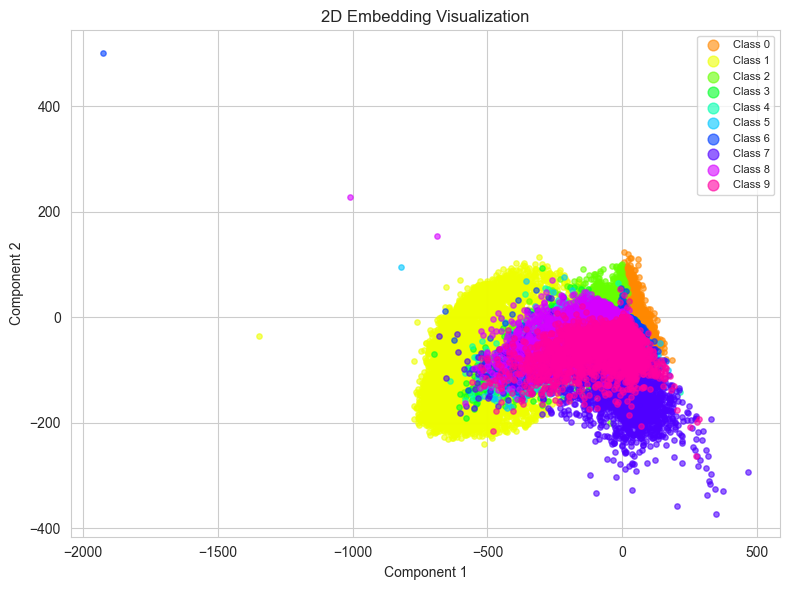

Information Capacity
(56000, 784) (56000, 2)
Start training
1
Early stopping at epoch 46
2
Early stopping at epoch 17
3
Early stopping at epoch 16
4
Early stopping at epoch 14
5
Early stopping at epoch 14


In [8]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X.astype('float32') / 255.0
y = y.astype(int)

y_bin = label_binarize(y, classes=np.unique(y))

X_train, X_test, y_train, y_test, y_train_bin, y_test_bin = train_test_split(
    X, y, y_bin, test_size=0.2, random_state=42
)

reduction_method = 'AE'  # 可选：'Raw', 'PCA', 'LDA', 'UMAP', 'AE'
n_components = 2
repeat_n = 5

loss_df, results_df, matrics = evaluate_model(
    model=Modified_MLP_Block,
    X_tr=X_train,
    y_tr=y_train,
    X_te=X_test,
    y_te=y_test,
    y_te_bin=y_test_bin,
    n=repeat_n,
    reduction_method=reduction_method,
    n_components=n_components,
)

In [6]:
print("\n评估指标汇总：")
print(results_df)
print(matrics)


评估指标汇总：
   Run  Accuracy  F1 Score   AUC-ROC  Cost Time  Stopping Epoch
0    1  0.760429  0.752280  0.971224   0.966439              20
1    2  0.915786  0.914831  0.992754   1.631508              39
2    3  0.886786  0.885387  0.988826   1.319708              32
3    4  0.400214  0.360585  0.838611   0.452108              11
4    5  0.365857  0.289898  0.772263   0.451116              11
       Mutual_Info_Mean  Fisher_Score  KNN_Accuracy  Trustworthiness
Value          0.006238      0.008592         0.106         0.463679


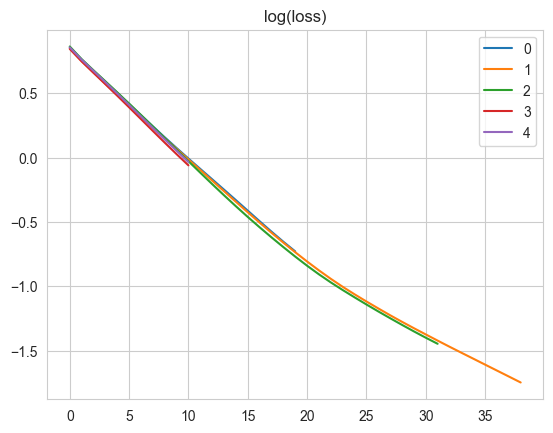

In [7]:
def plot_loss(loss_df, title = None):
    if title is None:
        plt.title('log(loss)')
    else:
        plt.title(title)
    for i,loss in enumerate(loss_df['Loss']):
        plt.plot(np.log(loss), label=i)
    plt.legend()
    plt.show()
plot_loss(loss_df)

▶ Running: method=Raw, n_components=2
Information Capacity
(56000, 784) (56000, 784)
Start training
1
Early stopping at epoch 11
2
Early stopping at epoch 32
3
Early stopping at epoch 25
4
Early stopping at epoch 30
5
Early stopping at epoch 22


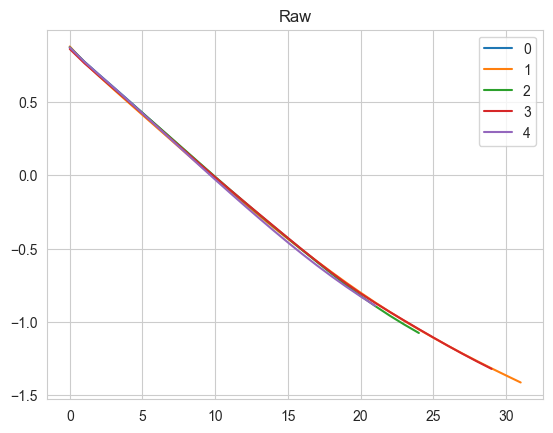

▶ Running: method=PCA, n_components=2
Information Capacity
(56000, 784) (56000, 2)
Start training
1
Early stopping at epoch 174
2
Early stopping at epoch 97
3
Early stopping at epoch 115
4
Early stopping at epoch 49
5
Early stopping at epoch 105


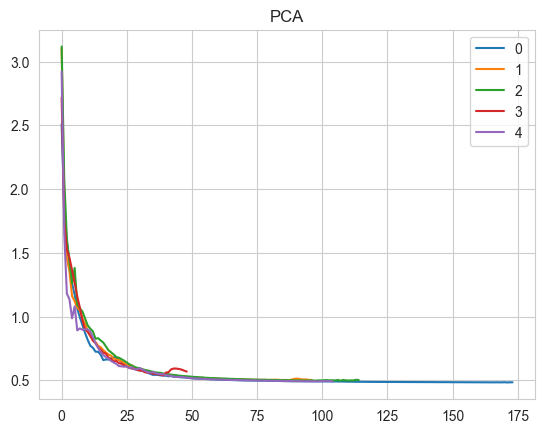

▶ Running: method=PCA, n_components=4
Information Capacity
(56000, 784) (56000, 4)
Start training
1
Early stopping at epoch 158
2
Early stopping at epoch 179
3
Early stopping at epoch 214
4
Early stopping at epoch 200
5
Early stopping at epoch 192


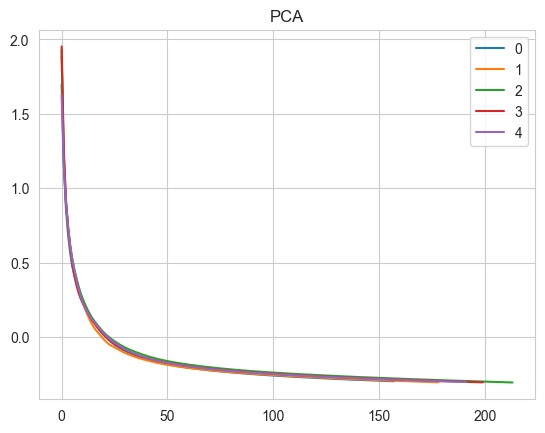

▶ Running: method=PCA, n_components=8
Information Capacity
(56000, 784) (56000, 8)
Start training
1
Early stopping at epoch 172
2
Early stopping at epoch 165
3
Early stopping at epoch 138
4
Early stopping at epoch 175
5
Early stopping at epoch 140


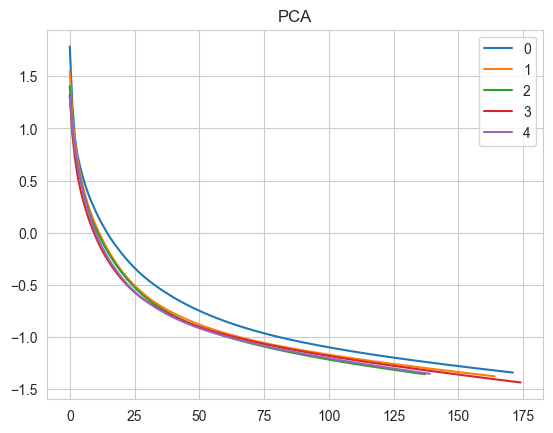

▶ Running: method=PCA, n_components=16
Information Capacity
(56000, 784) (56000, 16)
Start training
1
Early stopping at epoch 154
2
Early stopping at epoch 175
3
Early stopping at epoch 139
4
Early stopping at epoch 150
5
Early stopping at epoch 155


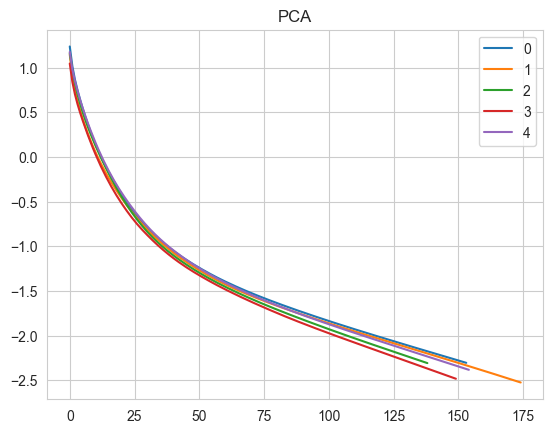

▶ Running: method=PCA, n_components=32
Information Capacity
(56000, 784) (56000, 32)
Start training
1
Early stopping at epoch 77
2
Early stopping at epoch 144
3
Early stopping at epoch 109
4
Early stopping at epoch 143
5
Early stopping at epoch 161


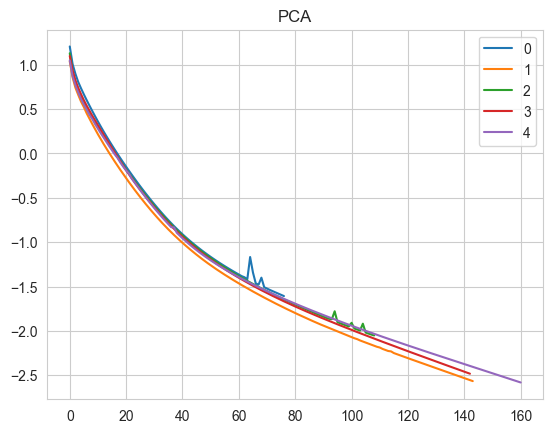

▶ Running: method=PCA, n_components=64
Information Capacity
(56000, 784) (56000, 64)
Start training
1
Early stopping at epoch 14
2
Early stopping at epoch 66
3
Early stopping at epoch 13
4
Early stopping at epoch 193
5
Early stopping at epoch 12


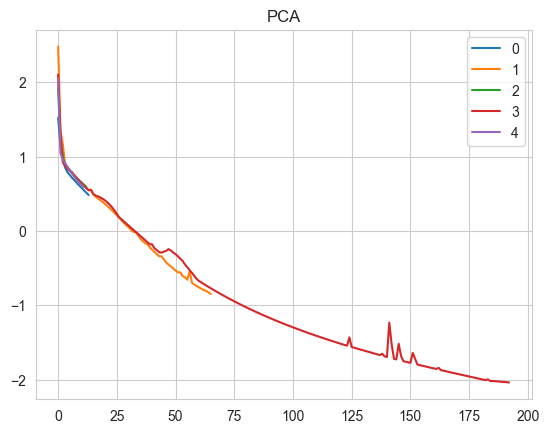

▶ Running: method=PCA, n_components=128
Information Capacity
(56000, 784) (56000, 128)
Start training
1
Early stopping at epoch 11
2
Early stopping at epoch 11
3
Early stopping at epoch 11
4
Early stopping at epoch 13
5
Early stopping at epoch 11


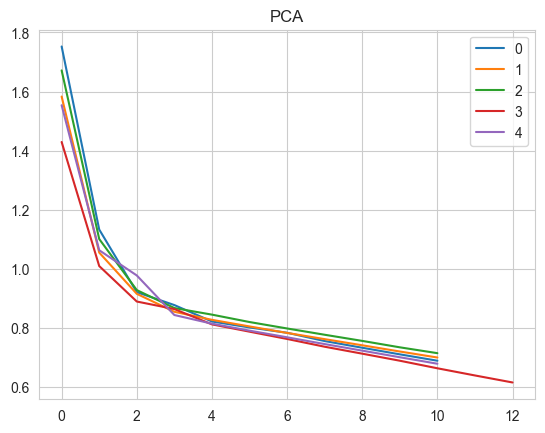

▶ Running: method=LDA, n_components=2
Information Capacity
(56000, 784) (56000, 2)
Start training
1
Early stopping at epoch 124
2
Early stopping at epoch 121
3
Early stopping at epoch 92
4
Early stopping at epoch 83
5
Early stopping at epoch 147


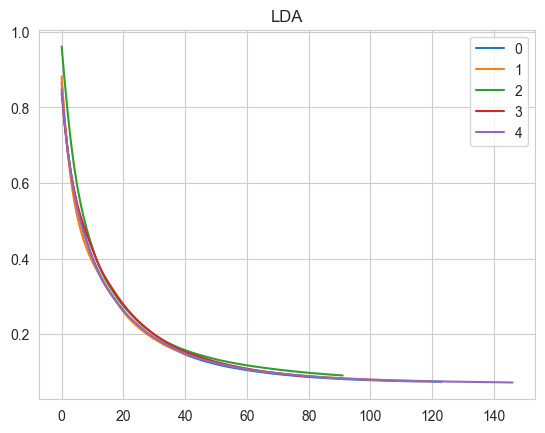

▶ Running: method=LDA, n_components=4
Information Capacity
(56000, 784) (56000, 4)
Start training
1
Early stopping at epoch 45
2
Early stopping at epoch 92
3
Early stopping at epoch 85
4
Early stopping at epoch 36
5
Early stopping at epoch 102


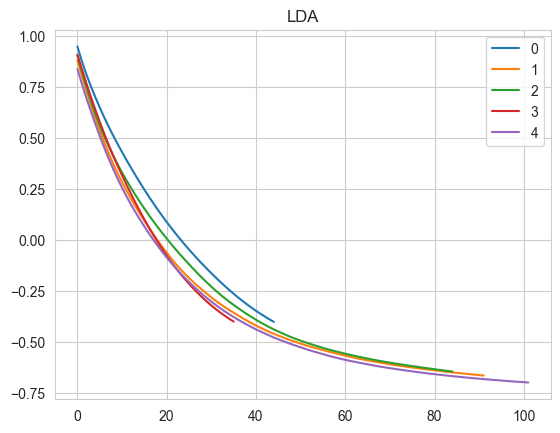

▶ Running: method=LDA, n_components=8
Information Capacity
(56000, 784) (56000, 8)
Start training
1
Early stopping at epoch 36
2
Early stopping at epoch 31
3
Early stopping at epoch 42
4
Early stopping at epoch 48
5
Early stopping at epoch 44


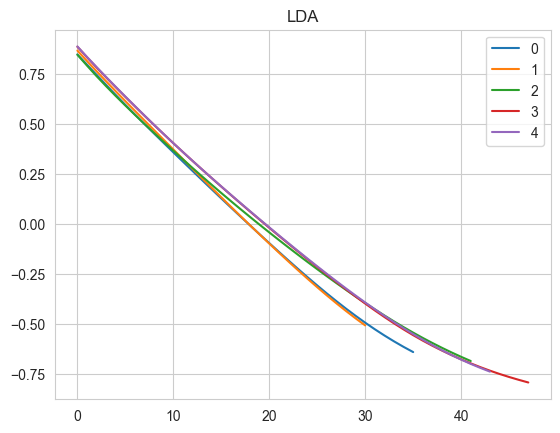

▶ Running: method=UMAP, n_components=2
Information Capacity
(56000, 784) (56000, 2)
Start training
1
Early stopping at epoch 243
2
Early stopping at epoch 170
3
Early stopping at epoch 152
4
Early stopping at epoch 210
5
Early stopping at epoch 211


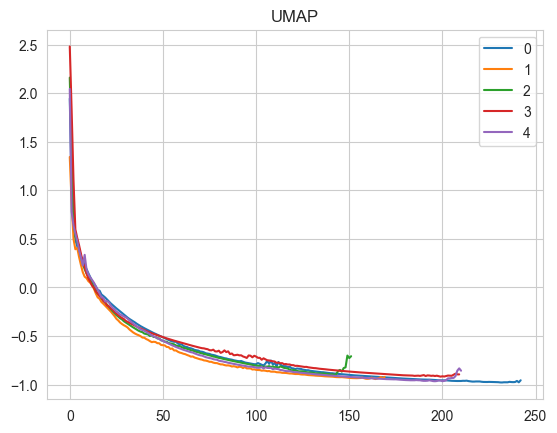

▶ Running: method=UMAP, n_components=4
Information Capacity
(56000, 784) (56000, 4)
Start training
1
Early stopping at epoch 194
2
Early stopping at epoch 190
3
Early stopping at epoch 199
4
Early stopping at epoch 161
5
Early stopping at epoch 113


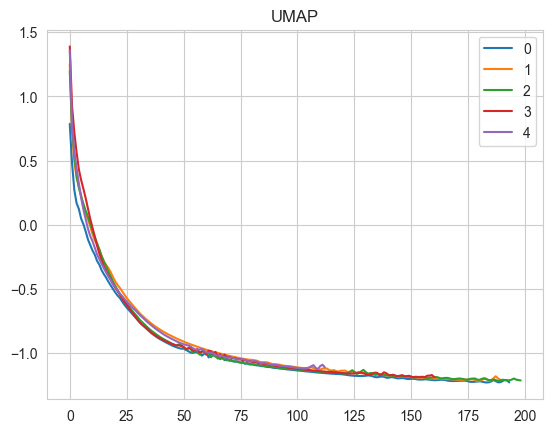

▶ Running: method=UMAP, n_components=8
Information Capacity
(56000, 784) (56000, 8)
Start training
1
Early stopping at epoch 169
2
Early stopping at epoch 219
3
Early stopping at epoch 128
4
Early stopping at epoch 138
5
Early stopping at epoch 287


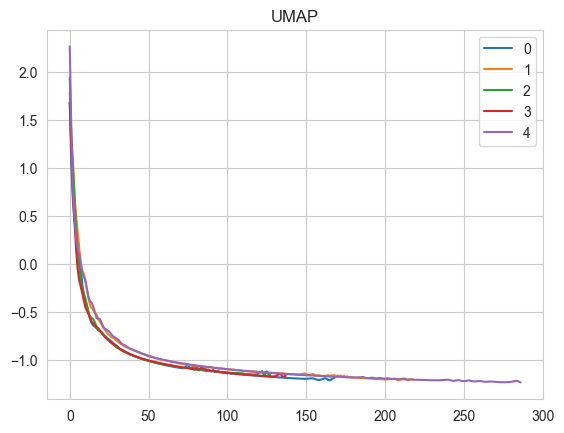

▶ Running: method=UMAP, n_components=16
Information Capacity
(56000, 784) (56000, 16)
Start training
1
Early stopping at epoch 155
2
Early stopping at epoch 133
3
Early stopping at epoch 182
4
Early stopping at epoch 143
5
Early stopping at epoch 144


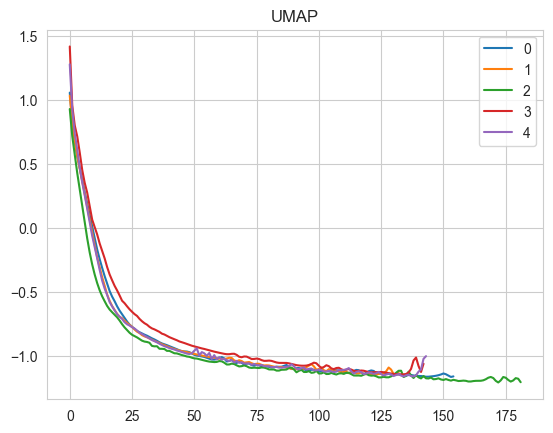

▶ Running: method=UMAP, n_components=32
Information Capacity
(56000, 784) (56000, 32)
Start training
1
Early stopping at epoch 183
2
Early stopping at epoch 128
3
Early stopping at epoch 106
4
Early stopping at epoch 125
5
Early stopping at epoch 74


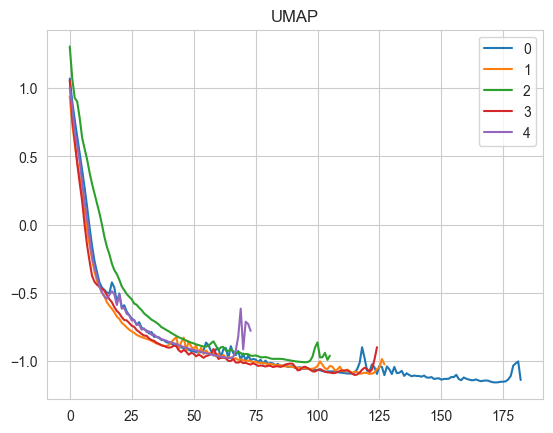

▶ Running: method=UMAP, n_components=64
Information Capacity
(56000, 784) (56000, 64)
Start training
1
Early stopping at epoch 63
2
Early stopping at epoch 101
3
Early stopping at epoch 113
4
Early stopping at epoch 76
5
Early stopping at epoch 59


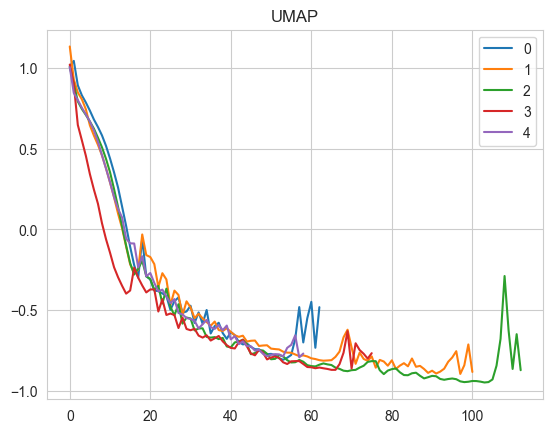

▶ Running: method=UMAP, n_components=128
Information Capacity
(56000, 784) (56000, 128)
Start training
1
Early stopping at epoch 67
2
Early stopping at epoch 85
3
Early stopping at epoch 92
4
Early stopping at epoch 96
5
Early stopping at epoch 64


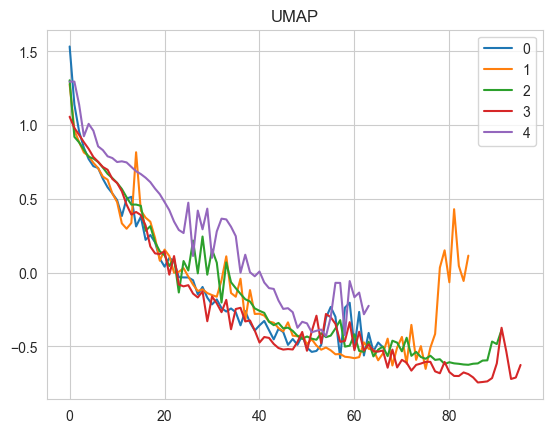

▶ Running: method=AE, n_components=2
Information Capacity
(56000, 784) (56000, 2)
Start training
1
Early stopping at epoch 45
2
Early stopping at epoch 12
3
Early stopping at epoch 78
4
Early stopping at epoch 21
5
Early stopping at epoch 19


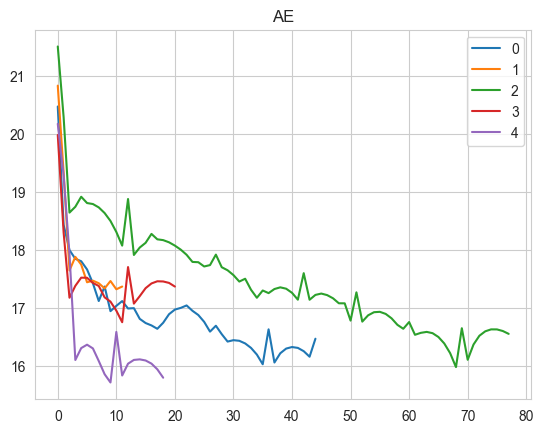

▶ Running: method=AE, n_components=4
Information Capacity
(56000, 784) (56000, 4)
Start training
1
Early stopping at epoch 12
2
Early stopping at epoch 46
3
Early stopping at epoch 13
4
Early stopping at epoch 13
5
Early stopping at epoch 29


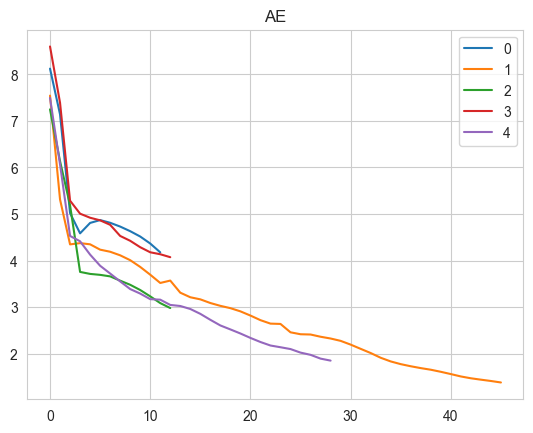

▶ Running: method=AE, n_components=8
Information Capacity
(56000, 784) (56000, 8)
Start training
1
Early stopping at epoch 62
2
Early stopping at epoch 80
3
Early stopping at epoch 77
4
Early stopping at epoch 263
5
Early stopping at epoch 29


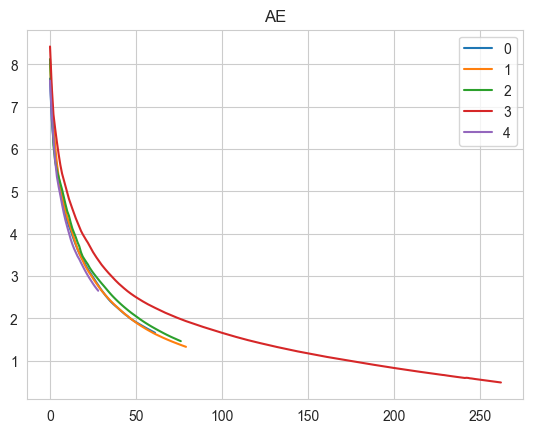

▶ Running: method=AE, n_components=16
Information Capacity
(56000, 784) (56000, 16)
Start training
1
Early stopping at epoch 42
2
Early stopping at epoch 247
3
Early stopping at epoch 71
4
Early stopping at epoch 88
5
Early stopping at epoch 366


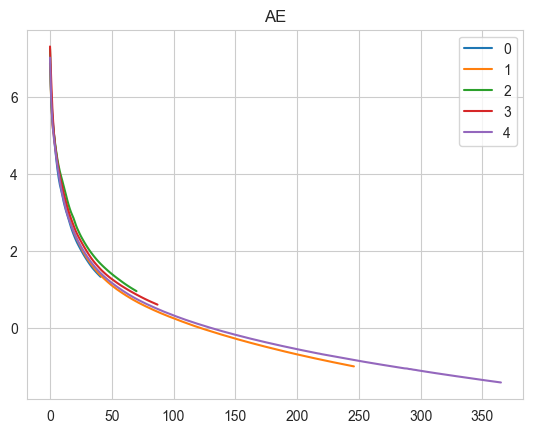

▶ Running: method=AE, n_components=32
Information Capacity
(56000, 784) (56000, 32)
Start training
1
Early stopping at epoch 13
2
Early stopping at epoch 40
3
Early stopping at epoch 51
4
Early stopping at epoch 25
5
Early stopping at epoch 11


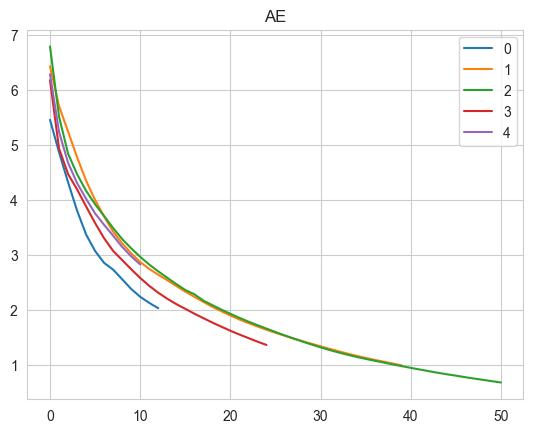

▶ Running: method=AE, n_components=64
Information Capacity
(56000, 784) (56000, 64)
Start training
1
Early stopping at epoch 158
2
Early stopping at epoch 64
3
Early stopping at epoch 53
4
Early stopping at epoch 27
5
Early stopping at epoch 189


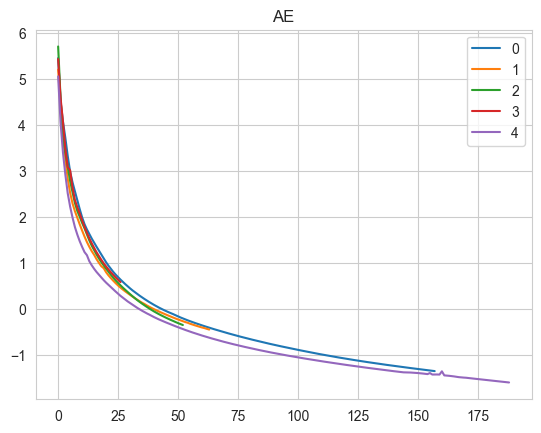

▶ Running: method=AE, n_components=128
Information Capacity
(56000, 784) (56000, 128)
Start training
1
Early stopping at epoch 54
2
Early stopping at epoch 33
3
Early stopping at epoch 86
4
Early stopping at epoch 69
5
Early stopping at epoch 40


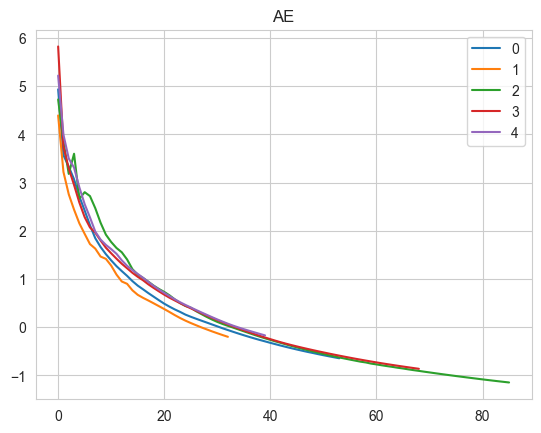

In [8]:
reduction_methods = ['Raw', 'PCA', 'LDA', 'UMAP', 'AE']
n_components_list = [2, 4, 8, 16, 32, 64, 128]
repeat_n = 5

results_summary = []

# 主循环
for method in reduction_methods:
    for n in n_components_list:
        if method == 'LDA' and n > 9:
            continue
        if method == 'Raw' and n > 2:
            continue
        print(f"▶ Running: method={method}, n_components={n}")
        try:
            loss_df, results_df, matrics = evaluate_model(
                model=Modified_MLP_Block,
                X_tr=X_train,
                y_tr=y_train,
                X_te=X_test,
                y_te=y_test,
                y_te_bin=y_test_bin,
                n=repeat_n,
                reduction_method=method,
                n_components=n,
            )

            row = {
                'method': method,
                'n_components': n,
                'repeat_n': repeat_n,
                'accuracy_mean': results_df['Accuracy'].mean(),
                'f1_mean': results_df['F1 Score'].mean(),
                'auc_mean': results_df['AUC-ROC'].mean(),
                'running_time': results_df['Cost Time'].mean(),
                'Mutual_Info_Mean': matrics['Mutual_Info_Mean'].values[0],
                'Fisher_Score': matrics['Fisher_Score'].values[0],
                'KNN_Accuracy': matrics['KNN_Accuracy'].values[0],
                'Trustworthiness': matrics['Trustworthiness'].values[0]
            }
            plot_loss(loss_df, method)
            results_summary.append(row)

        except Exception as e:
            print(f"Error with {method}-{n}: {e}")

In [10]:
# 汇总为 DataFrame
sweep_df = pd.DataFrame(results_summary)
sweep_df.to_csv("sweep_results.csv", index=False)
sweep_df

,method,n_components,repeat_n,accuracy_mean,f1_mean,auc_mean,runing_time,Mutual_Info_Mean,Fisher_Score,KNN_Accuracy,Trustworthiness
0,Raw,2,5,0.744243,0.735654,0.937489,0.975665,0.006238,0.008592,0.1060,0.463679
1,PCA,2,5,0.368257,0.349086,0.803253,2.644132,0.320226,0.643472,0.4485,0.674632
2,PCA,4,5,0.701400,0.696641,0.957055,4.643087,0.440553,0.880186,0.7065,0.831638
3,PCA,8,5,0.882300,0.880251,0.989599,3.885360,0.340722,0.668689,0.8610,0.918589
4,PCA,16,5,0.944729,0.944172,0.996065,3.802996,0.244788,0.468485,0.9035,0.957875
5,PCA,32,5,0.945286,0.944823,0.995819,3.151273,0.178622,0.324483,0.9095,0.979524
6,PCA,64,5,0.462600,0.437587,0.769306,1.533177,0.126628,0.200769,0.9115,0.991018
7,PCA,128,5,0.126200,0.102998,0.535975,0.305288,0.126628,0.200769,0.9115,0.991018
8,LDA,2,5,0.566400,0.555035,0.918504,2.815869,0.795299,3.458070,0.6040,0.633325
9,LDA,4,5,0.814957,0.808698,0.974440,1.784110,0.724938,2.892853,0.8390,0.719699


In [6]:
sweep_df = pd.read_csv("sweep_results.csv")
RAW_df = sweep_df.loc[sweep_df['method'] == 'Raw']
PCA_df = sweep_df.loc[sweep_df['method'] == 'PCA']
UMAP_df = sweep_df.loc[sweep_df['method'] == 'UMAP']
LDA_df = sweep_df.loc[sweep_df['method'] == 'LDA']
AE_df = sweep_df.loc[sweep_df['method'] == 'AE']

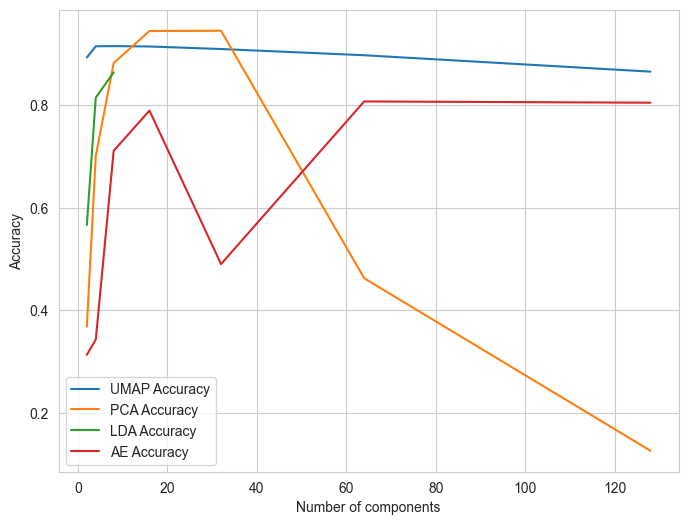

In [13]:
plt.figure(figsize=[8, 6])
plt.plot(UMAP_df['n_components'], UMAP_df['accuracy_mean'], label='UMAP Accuracy')
plt.plot(PCA_df['n_components'], PCA_df['accuracy_mean'], label='PCA Accuracy')
plt.plot(LDA_df['n_components'], LDA_df['accuracy_mean'], label='LDA Accuracy')
plt.plot(AE_df['n_components'], AE_df['accuracy_mean'], label='AE Accuracy')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.savefig("Accuracy.png")
plt.show()

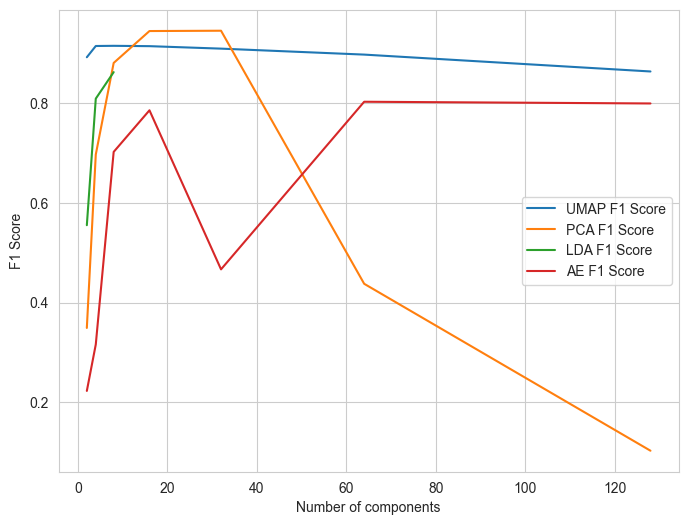

In [14]:
plt.figure(figsize=[8, 6])
plt.plot(UMAP_df['n_components'], UMAP_df['f1_mean'], label='UMAP F1 Score')
plt.plot(PCA_df['n_components'], PCA_df['f1_mean'], label='PCA F1 Score')
plt.plot(LDA_df['n_components'], LDA_df['f1_mean'], label='LDA F1 Score')
plt.plot(AE_df['n_components'], AE_df['f1_mean'], label='AE F1 Score')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('F1 Score')
plt.savefig("F1_Score.png")
plt.show()

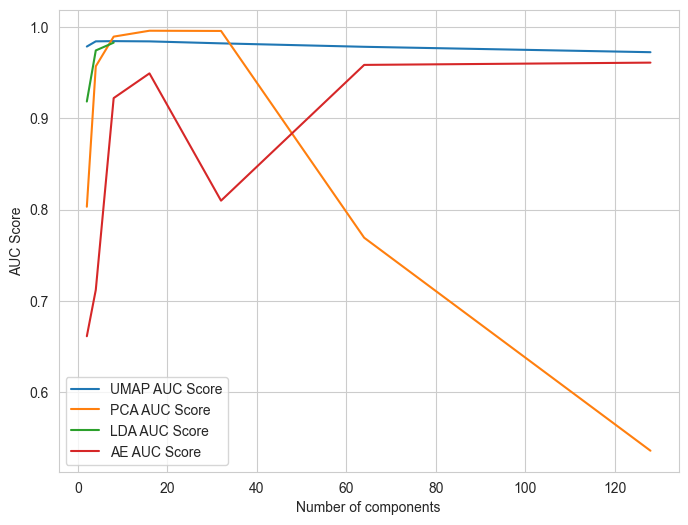

In [15]:
plt.figure(figsize=[8, 6])
plt.plot(UMAP_df['n_components'], UMAP_df['auc_mean'], label='UMAP AUC Score')
plt.plot(PCA_df['n_components'], PCA_df['auc_mean'], label='PCA AUC Score')
plt.plot(LDA_df['n_components'], LDA_df['auc_mean'], label='LDA AUC Score')
plt.plot(AE_df['n_components'], AE_df['auc_mean'], label='AE AUC Score')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('AUC Score')
plt.savefig("Auc_Mean.png")
plt.show()

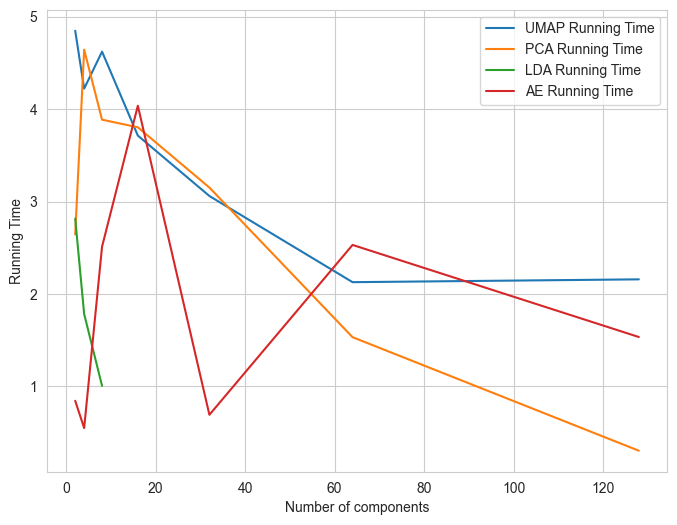

In [16]:
plt.figure(figsize=[8, 6])
plt.plot(UMAP_df['n_components'], UMAP_df['running_time'], label='UMAP Running Time')
plt.plot(PCA_df['n_components'], PCA_df['running_time'], label='PCA Running Time')
plt.plot(LDA_df['n_components'], LDA_df['running_time'], label='LDA Running Time')
plt.plot(AE_df['n_components'], AE_df['running_time'], label='AE Running Time')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Running Time')
plt.savefig("Running_Time.png")
plt.show()

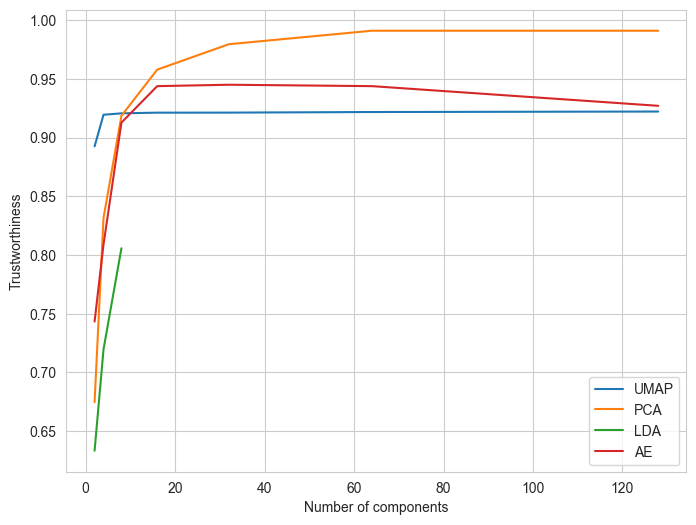

In [17]:
plt.figure(figsize=[8, 6])
plt.plot(UMAP_df['n_components'], UMAP_df['Trustworthiness'], label='UMAP')
plt.plot(PCA_df['n_components'], PCA_df['Trustworthiness'], label='PCA')
plt.plot(LDA_df['n_components'], LDA_df['Trustworthiness'], label='LDA')
plt.plot(AE_df['n_components'], AE_df['Trustworthiness'], label='AE')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Trustworthiness')
plt.savefig("Trustworthiness.png")
plt.show()

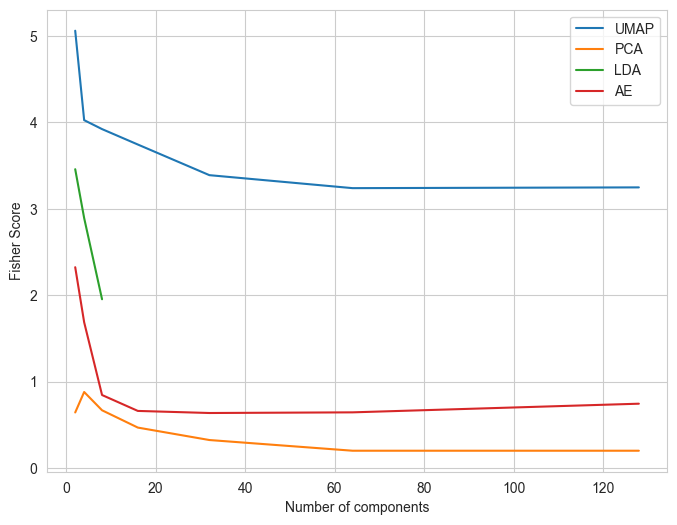

In [19]:
plt.figure(figsize=[8, 6])
plt.plot(UMAP_df['n_components'], UMAP_df['Fisher_Score'], label='UMAP')
plt.plot(PCA_df['n_components'], PCA_df['Fisher_Score'], label='PCA')
plt.plot(LDA_df['n_components'], LDA_df['Fisher_Score'], label='LDA')
plt.plot(AE_df['n_components'], AE_df['Fisher_Score'], label='AE')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Fisher Score')
plt.savefig("Fisher_Score.png")
plt.show()

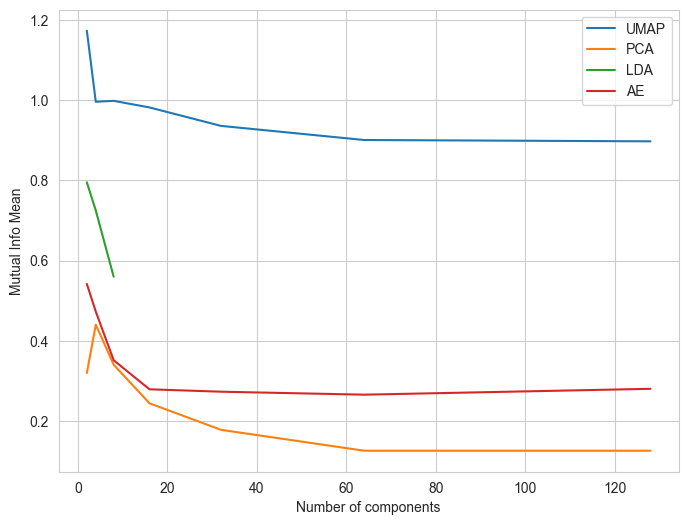

In [20]:
plt.figure(figsize=[8, 6])
plt.plot(UMAP_df['n_components'], UMAP_df['Mutual_Info_Mean'], label='UMAP')
plt.plot(PCA_df['n_components'], PCA_df['Mutual_Info_Mean'], label='PCA')
plt.plot(LDA_df['n_components'], LDA_df['Mutual_Info_Mean'], label='LDA')
plt.plot(AE_df['n_components'], AE_df['Mutual_Info_Mean'], label='AE')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Mutual Info Mean')
plt.savefig("Mutual_Info_Mean.png")
plt.show()

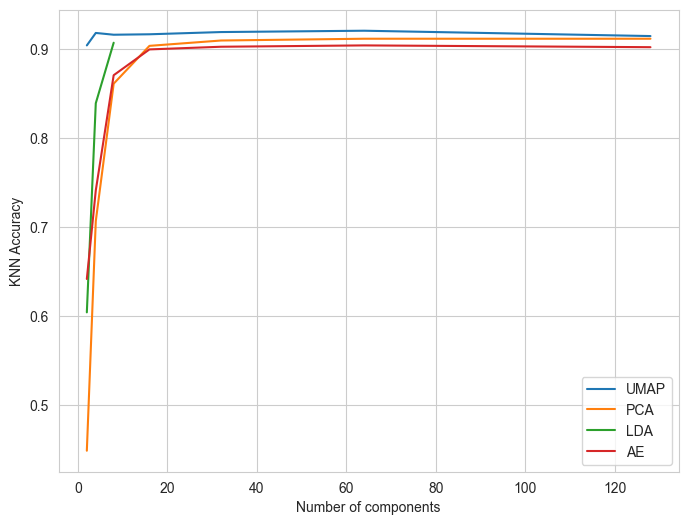

In [21]:
plt.figure(figsize=[8, 6])
plt.plot(UMAP_df['n_components'], UMAP_df['KNN_Accuracy'], label='UMAP')
plt.plot(PCA_df['n_components'], PCA_df['KNN_Accuracy'], label='PCA')
plt.plot(LDA_df['n_components'], LDA_df['KNN_Accuracy'], label='LDA')
plt.plot(AE_df['n_components'], AE_df['KNN_Accuracy'], label='AE')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('KNN Accuracy')
plt.savefig("KNN_Accuracy.png")
plt.show()